In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [139]:
def plot_photon_state(dark_theme=True, sigma_k=0.2, colormap='rocket', dpi=120, figsize=(10, 5), samples=100):
    # adapted from
    # https://ssebastianmag.medium.com/computational-physics-with-python-hydrogen-wavefunctions-electron-density-plots-8fede44b7b12
    # sigma_k is the packet width

    # Colormap validation
    try:
        sns.color_palette(colormap)
    except ValueError:
        raise ValueError(f'{colormap} is not a recognized Seaborn colormap.')

    # Configure plot aesthetics using matplotlib rcParams settings
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['xtick.major.size'] = 15
    plt.rcParams['ytick.major.size'] = 15
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    plt.rcParams['axes.linewidth'] = 1

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    normalization_constant = 1 / ((2*np.pi * sigma_k **2)**(3/2))
    alpha = 1 / np.sqrt(3)
    beta = np.sqrt(2/3)

    photon_state = lambda x, y, coef: coef * normalization_constant * np.exp(-(x**2 + y**2) / (2*sigma_k**2))

    x = np.linspace(-1, 1, samples)
    y = np.linspace(-1, 1, samples)
    X, Y = np.meshgrid(x, y)

    # make the plots for the first and second photon states
    ax1.set_title(r"$|\psi_1\rangle =  \hat{a}^\dagger(k) \alpha|0\rangle$")
    ax2.set_title(r"$|\psi_2\rangle =  \hat{a}^\dagger(k) \beta|2\rangle$")
    im1 = ax1.imshow(photon_state(X, Y, alpha), cmap=sns.color_palette(colormap, as_cmap=True))
    im2 = ax2.imshow(photon_state(X, Y, beta), cmap=sns.color_palette(colormap, as_cmap=True))

    cbar1 = plt.colorbar(im1, fraction=0.046, pad=0.03)
    cbar1.set_ticks([])
    cbar2 = plt.colorbar(im2, fraction=0.046, pad=0.03)
    cbar2.set_ticks([])

    # Apply dark theme parameters
    if dark_theme:
        theme = 'dt'
        background_color = sorted(
            sns.color_palette(colormap, n_colors=100),
            key=lambda color: 0.2126 * color[0] + 0.7152 * color[1] + 0.0722 * color[2]
        )[0]
        plt.rcParams['text.color'] = '#dfdfdf'
        title_color = '#dfdfdf'
        
        for (ax, cbar) in ((ax1, cbar1), (ax2, cbar2)):
            fig.patch.set_facecolor(background_color)
            cbar.outline.set_visible(False)
            cbar.outline.set_visible(False)
            ax.tick_params(axis='x', colors='#c4c4c4')
            ax.tick_params(axis='y', colors='#c4c4c4')
            for spine in ax.spines.values():
                spine.set_color('#c4c4c4')

    else:  # Apply light theme parameters
        theme = 'lt'
        plt.rcParams['text.color'] = '#000000'
        title_color = '#000000'
        for ax in (ax1, ax2):
            ax.tick_params(axis='x', colors='#000000')
            ax.tick_params(axis='y', colors='#000000')

    equation = r"\langle \hat{A}^\mu(x) \rangle = \alpha^* \frac{1}{(2\pi \sigma_k^2)^{3/2}} \exp\left( - \frac{x^2}{2 \sigma_k^2} \right) + \beta^* \frac{1}{(2\pi \sigma_k^2)^{3/2}} \exp\left( - \frac{x^2}{2 \sigma_k^2} \right)"

    plt.suptitle(f'Quantum electrodynamics - visualization of photon field state\n${equation}$', color=title_color)
    #plt.text(-75, -10, f"${equation}$")
    #ax.text(0, 722, (
    #    r'$|\psi_{n \ell m}(r, \theta, \varphi)|^{2} ='
    #    r' |R_{n\ell}(r) Y_{\ell}^{m}(\theta, \varphi)|^2$'
    #), fontsize=36)
    #ax.text(30, 615, r'$({0}, {1}, {2})$'.format(n, l, m), color='#dfdfdf', fontsize=42)
    
    #plt.text(770, 140, r'Photon field $A^\mu$', rotation='vertical', fontsize=40)

    
    #ax.text(705, 700, 'Higher\nprobability', fontsize=24)
    #ax.text(705, -60, 'Lower\nprobability', fontsize=24)
    #ax.text(775, 590, '+', fontsize=34)
    #ax.text(769, 82, '−', fontsize=34, rotation='vertical')
    #ax.invert_yaxis()

    # Save and display the plot
    #plt.savefig("QFT-1.png")
    plt.show()

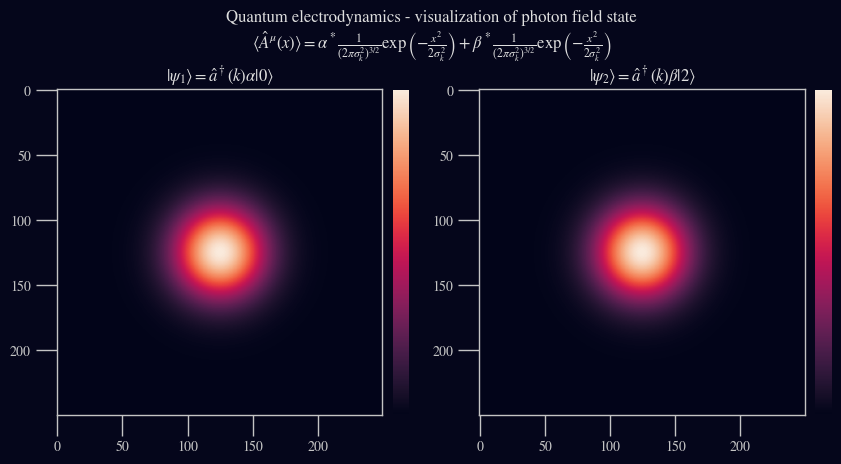

In [140]:
plot_photon_state(samples=250)